*Contenuti*
===
- [Il dataset *nyc-rolling-sales*](#Il-dataset-nyc-rolling-sales)
- [La libreria Pandas](#La-libreria-Pandas)
    - [*Series*, accesso, slicing e rimozione](#Series,-accesso,-slicing-e-rimozione)  
    - [Codifica *one-hot*](#Codifica-one-hot)
    - [Esercizio 1](#Esercizio-1)
    - [Costrutti avanzati e spunti vari](#Costrutti-avanzati-e-spunti-vari)
        - [Costruzione di nuove colonne](#Costruzione-di-nuove-colonne)
        - [La-funzione-*groupby*](#La-funzione-groupby)
        - [Indicizzazione e grouping temporale](#Indicizzazione-e-grouping-temporale)
        - [Visualizzazione statistica: la libreria *seaborn*](#Visualizzazione-statistica:-la-libreria-seaborn)

Il dataset *nyc-rolling-sales*
===

Finora abbiamo ottenuto dati:

- generandoli casualmente
- importandoli dai toy dataset di sklearn.

In entrambi i casi, i dati erano già in forma numerica, pronti per i modelli di machine learning. Più realisticamente, troviamo dati su file .csv in formato misto.

Quello che useremo in questo notebook è preso da *Kaggle*. Kaggle è un sito che ospita competizioni di machine learning, e un hub per la data science. E' utilissimo per fare pratica: oltre a molti dataset realistici, https://www.kaggle.com/datasets, sono disponibili centinaia di notebook come questo (chiamati *kernel*) con esempi pratici.

In particolare, il dataset *nyc-rolling-sales* contiene le informazioni di tutti gli edifici e le unità abitative vendute a New York negli ultimi 12 mesi. In questo caso, il periodo considerato è 9/16 - 9/17: https://www.kaggle.com/new-york-city/nyc-property-sales.

La libreria Pandas
===

*Pandas* è la libreria di Python per la visualizzazione, manipolazione e analisi dei dati grezzi, ed è ispirata ai *dataframe* del linguaggio R.

Mette a disposizione centinaia di funzioni, anche grafiche, e richiede un po' di sforzo iniziale. Con questo strumento, però, possiamo fare *tutto* senza uscire dal nostro notebook jupyter.

In rete trovate svariate introduzioni all'utilizzo della libreria:

- https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
- https://www.pythonforengineers.com/introduction-to-pandas/
- https://www.codecademy.com/learn/data-processing-pandas/modules/dspath-intro-pandas
- ...


In questa lezione usiamo Pandas per ripulire il dataset nyc-rolling-sales, in modo da poterci fare machine learning (con gli strumenti visti nelle Lezioni 6 e 7).

Come al solito, importiamo la libreria e diamogli un nome convenzionale.

In [98]:
import pandas as pd

pd.__version__

'0.24.2'

Iniziamo caricando i dati con la funzione *read_csv*. Per ulteriori opzioni di utilizzo su questa (quale separatore usare, quali colonne caricare, ecc.) e su altre funzioni, premete Shift-Tab-Tab dopo il nome della funzione o cercate nella documentazione: https://pandas.pydata.org/pandas-docs/stable/.

In [143]:
df = pd.read_csv('data/nyc_rolling_sales.csv')

Cosa abbiamo caricato dentro il DataFrame df? La funzione *head* mostra le prime (di default 5) righe del dataset.

In [100]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,1633,6440,1900,2,C2,2017-07-19 00:00:00,6625000
1,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,2272,6794,1913,2,C4,2016-09-23 00:00:00,3936272
2,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,2369,4615,1900,2,C2,2016-11-17 00:00:00,8000000
3,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,1750,4226,1920,2,C4,2016-09-23 00:00:00,3192840
4,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,4489,18523,1920,2,D9,2016-11-07 00:00:00,16232000


*Series*, accesso, slicing e rimozione
---

Un DataFrame Pandas eredita alcune delle proprietà di un array NumPy.

In [101]:
df.shape

(29334, 19)

Pandas aggiunge ad un array NumPy una semantica (le colonne hanno un nome) e una struttura di indici.

In [102]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS',
       'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'SALE PRICE'],
      dtype='object')

Ciascuna colonna è detta *Series*. Si può accedere ai valori di una Series attraverso il suo nome. Vediamo alcuni esempi.

Qui trovate un glossario delle feature del dataset nyc-rolling-sales: https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf.

In [130]:
df['NEIGHBORHOOD'].head(15)

0     ALPHABET CITY
1     ALPHABET CITY
2     ALPHABET CITY
3     ALPHABET CITY
4     ALPHABET CITY
5     ALPHABET CITY
6     ALPHABET CITY
7     ALPHABET CITY
8     ALPHABET CITY
9     ALPHABET CITY
10    ALPHABET CITY
11    ALPHABET CITY
12          CHELSEA
16          CHELSEA
17          CHELSEA
Name: NEIGHBORHOOD, dtype: object

In [104]:
df['NEIGHBORHOOD'].describe()

count              29334
unique               250
top       FLUSHING-NORTH
freq                 798
Name: NEIGHBORHOOD, dtype: object

In [105]:
df['BOROUGH'].value_counts()

QUEENS           11078
BROOKLYN          8670
STATEN ISLAND     5064
BRONX             3512
MANHATTAN         1010
Name: BOROUGH, dtype: int64

Ci sono diversi modi di accedere ai valori di un DataFrame. *iloc* (che sta per *integer location*) permette di farlo come su array NumPy.

In [107]:
df.iloc[:3, 1:6]

,NEIGHBORHOOD,BUILDING CLASS,TAX CLASS AT PRESENT,BLOCK,LOT
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55


E' possibile estrarre un insieme di colonne per nome con la sintassi

        df[col_list]

In [109]:
df[['NEIGHBORHOOD', 'SALE DATE', 'SALE PRICE']].head(3)

,NEIGHBORHOOD,SALE DATE,SALE PRICE
0,ALPHABET CITY,2017-07-19 00:00:00,6625000
1,ALPHABET CITY,2016-09-23 00:00:00,3936272
2,ALPHABET CITY,2016-11-17 00:00:00,8000000


Con la sintassi

        df[condition(df)]
        
isoliamo le righe di un dataframe che rispettano un certo criterio (la condizione booleana *condition*).

In [110]:
df[df['BOROUGH'] == 'BRONX'].shape

(3512, 19)

Ci sono delle proprietà vendute per meno di 100$: dal glossario vediamo che sono donazioni. Vediamo quante sono ed eliminiamole dal dataset.

In [122]:
df['SALE PRICE'].min()

1

In [124]:
df[df['SALE PRICE'] < 100].shape

(671, 19)

In [125]:
df = df[df['SALE PRICE'] >= 100]

In [126]:
df['SALE PRICE'].min()

100

Le funzione *drop* permette di eliminare una o più colonne da un dataframe. Eliminiamo ad esempio la colonna *ZIP CODE*.

In [131]:
df = df.drop(columns=['ZIP CODE'])

In [132]:
'ZIP CODE' in df.columns

False

Codifica *one-hot*
---

I valori di una feature *nominale* (per esempio, il gruppo sanguigno o l'etnia) non possono essere semplicementi mappati su numeri interi.

Per evitare di creare relazioni spurie tra i valori di una variabile nominale, occorre codificarla in modo *one-hot*. In Pandas, questo si ottiene con la funzione *get_dummies*. Applichiamola sulla feature BOROUGH.

In [145]:
df['BOROUGH'].value_counts()

QUEENS           11078
BROOKLYN          8670
STATEN ISLAND     5064
BRONX             3512
MANHATTAN         1010
Name: BOROUGH, dtype: int64

In [141]:
df = pd.get_dummies(df, prefix=['BOR'], columns=['BOROUGH'])

df.head()

,NEIGHBORHOOD,BUILDING CLASS,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,...,YEAR BUILT,TAX CLASS,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE,BOR_BRONX,BOR_BROOKLYN,BOR_MANHATTAN,BOR_QUEENS,BOR_STATEN ISLAND
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,...,1900,2,C2,2017-07-19 00:00:00,6625000,0,0,1,0,0
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,...,1913,2,C4,2016-09-23 00:00:00,3936272,0,0,1,0,0
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,...,1900,2,C2,2016-11-17 00:00:00,8000000,0,0,1,0,0
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,...,1920,2,C4,2016-09-23 00:00:00,3192840,0,0,1,0,0
4,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,...,1920,2,D9,2016-11-07 00:00:00,16232000,0,0,1,0,0


La funzione get_dummies ha trasformato la colonna BOROUGH in tante colonne (booleane) quanti sono i suoi valori.

In [142]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS', 'TAX CLASS AT PRESENT', 'BLOCK',
       'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS',
       'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'SALE PRICE',
       'BOR_BRONX', 'BOR_BROOKLYN', 'BOR_MANHATTAN', 'BOR_QUEENS',
       'BOR_STATEN ISLAND'],
      dtype='object')

Esercizio 1
---

Ipotizziamo di voler utilizzare il dataset nyc-rolling-sales per predire il prezzo di una edificio o di una unità abitativa, a partire dalle sue feature.

Utilizzando quanto visto in questa e nella precedenti Lezioni:

- preparare il dataset: codificare correttamente ed eliminare eventuali colonne; isolare la variabile da predire
- utilizzare i modelli di machine learning noti per il task di previsione, come visto nella Lezione 7
- scegliere una metrica e valutare i risultati ottenuti.

Consigli:

- iniziate dagli esercizi delle lezioni precedenti
- prima di scrivere il codice, *pensate* a cosa volete fare/ottenere
- usate un nuovo notebook
- scrivete poco codice alla volta
- cancellate le celle che non state usando
- se non ci capite più niente (o avete distrutto qualche preziosa variabile), niente paura: riavviate il notebook e rilanciate le celle
- provate qualche costrutto avanzato tra quelli delle prossime celle

Costrutti avanzati e spunti vari
---

Nelle celle successive trovate qualche esempio di utilizzo di costrutti avanzati.

### Costruzione di nuove colonne

### La funzione *groupby*

Tra le molte funzioni avanzate di Pandas, *groupby* è relativamente facile da usare e permette di fare analisi preziose. Calcoliamo ad esempio il costo mediano delle proprietà *per zona*.

In [147]:
df.groupby(['BOROUGH'])['SALE PRICE'].median()

BOROUGH
BRONX             480000
BROOKLYN          850000
MANHATTAN        6025000
QUEENS            635000
STATEN ISLAND     485000
Name: SALE PRICE, dtype: int64

La funzione groupby applica la stessa funzione (in questo caso *median*) a tutti i gruppi creati; in particolare:

- raggruppa per zona (colonna *BOROUGH*)
- estre la colonna *SALE PRICE*, ottenendo tanti vettori di prezzi quanti sono le zone di NYC
- estrae, da ogni gruppo (quindi da ogni vettore), la mediana.

Ecco altri esempi.

In [148]:
df.groupby(['BOROUGH'])['SALE PRICE'].min()

BOROUGH
BRONX            1
BROOKLYN         1
MANHATTAN        1
QUEENS           1
STATEN ISLAND    1
Name: SALE PRICE, dtype: int64

In [149]:
df.groupby(['BOROUGH', 'TAX CLASS AT PRESENT'])['SALE PRICE'].median()

BOROUGH        TAX CLASS AT PRESENT
BRONX          1                        450000
               2                       4882500
               2A                       613500
               2B                      1175000
               4                       1700000
BROOKLYN       1                        775000
               2                       5400000
               2A                      1300000
               2B                      2365000
               4                       2032500
MANHATTAN      1                       4300000
               2                       8962500
               2A                      2807500
               2B                      4567000
               2C                        90000
               4                       7244000
QUEENS         1                        613000
               2                       9175000
               2A                      1103900
               2B                      1475000
               4        

### Indicizzazione e grouping temporale

Pandas usa una colonna speciale (*index*) per indicizzare i record, che possiamo scegliere. Vogliamo usare la colonna *SALE DATE*, in modo da avere un'indicizzazione numerica.

Quando la carichiamo dal csv, la colonna contiene stringhe: per prima cosa, trasformiamole in date, utilizzando la funzione *to_datetime*.

In [80]:
df['SALE DATE'].describe()

count                   29334
unique                    339
top       2016-09-22 00:00:00
freq                      202
Name: SALE DATE, dtype: object

In [81]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [82]:
df['SALE DATE'].describe()

count                   29334
unique                    339
top       2016-09-22 00:00:00
freq                      202
first     2016-09-01 00:00:00
last      2017-08-31 00:00:00
Name: SALE DATE, dtype: object

Adesso usiamo la funzione *set_index* per cambiare colonna di indicizzazione.

In [83]:
df = df.set_index('SALE DATE', drop=True)#con drop=True elimino colonna dopo averla usata

In [84]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS,BUILDING CLASS AT TIME OF SALE,SALE PRICE
SALE DATE,,,,,,,,,,,,,,,,,,
2017-07-19,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,1633,6440,1900,2,C2,6625000
2016-09-23,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,2272,6794,1913,2,C4,3936272
2016-11-17,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,2369,4615,1900,2,C2,8000000
2016-09-23,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,1750,4226,1920,2,C4,3192840
2016-11-07,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,4489,18523,1920,2,D9,16232000


Indicizzare per data ha il vantaggio di poter rappresentare graficamente i dati sulla linea temporale. Ecco un esempio.

In [88]:
grouper = pd.Grouper(level='SALE DATE', freq='15d')
price_by_15days = df['SALE PRICE'].groupby(grouper).mean()

La funzione groupby accetta un oggetto *Grouper*, che serve per raggruppare temporalmente. Nell'esempio qui sopra, il Grouper costruisce gruppi di 15 giorni basandosi sul valore di SALE DATE.

*price_by_15days* conterrà quindi medie il prezzo medio di vendita su intervalli di 15 giorni. Usiamo la funzione *plot* per ottenere un risultato grafico.

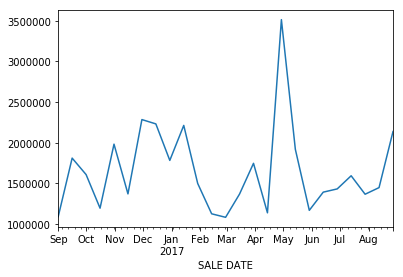

In [90]:
price_by_15days.plot()

### Visualizzazione statistica: la libreria *seaborn*

In [122]:
df['SALE PRICE'].describe()

count    2.771300e+04
mean     9.049892e+05
std      1.073338e+06
min      1.000000e+03
25%      4.300000e+05
50%      6.250000e+05
75%      9.400000e+05
max      1.000000e+07
Name: SALE PRICE, dtype: float64

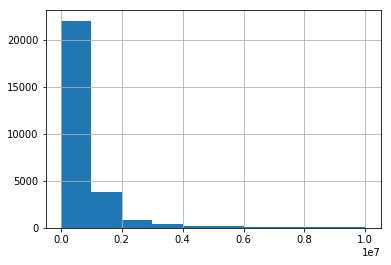

In [129]:
df['SALE PRICE'].hist()

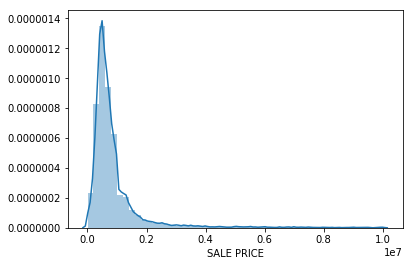

In [131]:
import seaborn as sns

sns.distplot(df['SALE PRICE'])

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>